In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("googleplaystore.csv")

In [3]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
dataset.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8195,Knife Hit,GAME,4.5,462614,60M,"10,000,000+",Free,0,Everyone,Arcade,"May 22, 2018",1.7.2,4.0.3 and up
3756,Loop - Caribbean Local News,NEWS_AND_MAGAZINES,4.0,4332,12M,"1,000,000+",Free,0,Everyone,News & Magazines,"March 16, 2018",3.0.42,4.1 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79k,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
6647,Gold Wallpapers,PERSONALIZATION,4.5,43,28M,"10,000+",Free,0,Everyone,Personalization,"March 26, 2018",1.1,4.0 and up
6510,BN Pro PercentXL-b Neon HD Txt,LIBRARIES_AND_DEMO,4.0,45,842k,"5,000+",Free,0,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up
9802,File Ex - ES File Explorer,TOOLS,4.2,24,5.0M,"1,000+",Free,0,Everyone,Tools,"December 27, 2017",1.1.6,4.2 and up
2495,Super Hearing Super Ear Amplifier,MEDICAL,4.1,21,20M,"1,000+",Free,0,Everyone,Medical,"June 11, 2018",1.1,4.1 and up
5215,AI Draw | Art Filter for Selfie,PHOTOGRAPHY,3.0,20,4.3M,"1,000+",Paid,$2.99,Everyone,Photography,"June 18, 2018",1.4.7,5.0 and up
5201,Friday: Smart Personal Assistant,PRODUCTIVITY,4.4,2087,8.3M,"100,000+",Free,0,Everyone,Productivity,"June 24, 2018",20,5.0 and up
6371,Coupons for Burger King,FOOD_AND_DRINK,4.5,41,4.0M,500+,Free,0,Teen,Food & Drink,"July 17, 2018",1,5.0 and up


In [5]:
dataset["Price"] = dataset["Price"].str.replace("Everyone", "0")
dataset["Price"] = dataset["Price"].str.replace(r"[^\d]", "", regex = True)
dataset["Price"] = pd.to_numeric(dataset["Price"], errors = 'coerce')


In [6]:
dataset["Installs"] = dataset["Installs"].replace("Free", "0")
dataset["Installs"] = dataset["Installs"].replace(r"[+,]","", regex= True)
dataset["Installs"] = pd.to_numeric(dataset["Installs"], errors = 'coerce')

In [7]:
dataset["Last Updated"] = pd.to_datetime(dataset["Last Updated"], errors = 'coerce')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  int64         
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [9]:
dataset["Rating"].fillna(dataset["Rating"].median(), inplace = True)

C:\Users\Shrir\AppData\Local\Temp\ipykernel_20352\2359402858.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Rating"].fillna(dataset["Rating"].median(), inplace = True)


In [10]:
dataset["Type"].fillna(dataset["Type"].mode()[0], inplace=True)

C:\Users\Shrir\AppData\Local\Temp\ipykernel_20352\1197565381.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Type"].fillna(dataset["Type"].mode()[0], inplace=True)


In [11]:
dataset["Content Rating"].fillna(dataset["Type"].mode()[0], inplace=True)

C:\Users\Shrir\AppData\Local\Temp\ipykernel_20352\1603642148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Content Rating"].fillna(dataset["Type"].mode()[0], inplace=True)


In [12]:
dataset["Last Updated"].fillna(dataset["Last Updated"].mode()[0], inplace = True)

C:\Users\Shrir\AppData\Local\Temp\ipykernel_20352\2586708021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Last Updated"].fillna(dataset["Last Updated"].mode()[0], inplace = True)


In [13]:
dataset["Current Ver"].fillna(dataset["Current Ver"].mode()[0], inplace =True)

C:\Users\Shrir\AppData\Local\Temp\ipykernel_20352\2573385106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Current Ver"].fillna(dataset["Current Ver"].mode()[0], inplace =True)


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  int64         
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [15]:
dataset.duplicated().sum()

np.int64(483)

In [16]:
dataset = dataset.drop_duplicates(keep='first')

In [17]:
dataset.describe()

,Rating,Installs,Price,Last Updated
count,10358.000000,1.035800e+04,10358.000000,10358
mean,4.205165,1.415639e+07,103.070091,2017-11-14 10:01:41.486773504
min,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.100000,1.000000e+03,0.000000,2017-09-03 00:00:00
50%,4.300000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,19.000000,1.000000e+09,40000.000000,2018-08-08 00:00:00
std,0.506868,8.023580e+07,1627.784252,NaN


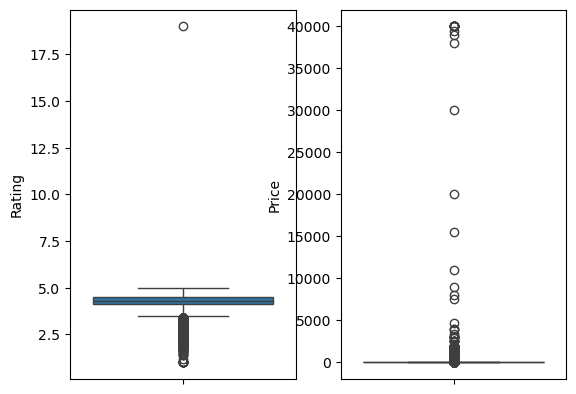

In [18]:
plt.subplot(1,2,1)
sns.boxplot(dataset["Rating"])
plt.subplot(1,2,2)
sns.boxplot(dataset["Price"])
plt.show()

In [19]:
dataset = dataset[dataset["Rating"]<=5]

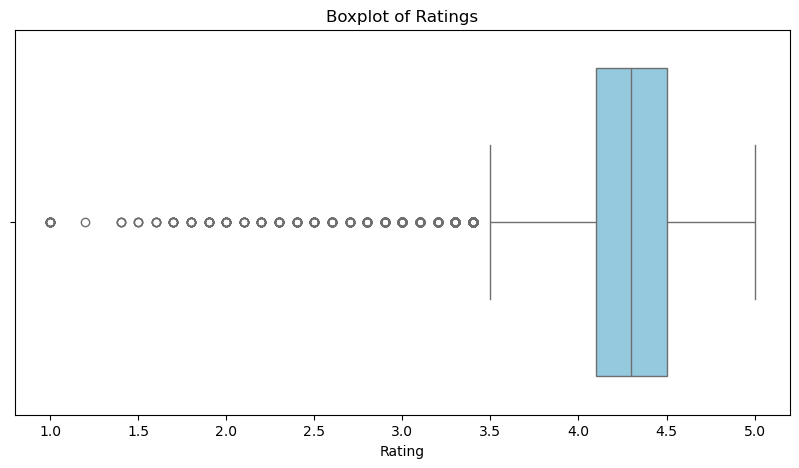

In [20]:
plt.figure(figsize = (10,5))
sns.boxplot(x=dataset["Rating"], color ="skyblue")
plt.title("Boxplot of Ratings")
plt.show()

### Capping of Price column outliers using percentile method

In [21]:
upper_limit = dataset["Price"].quantile(0.95)
upper_limit

np.float64(199.0)

In [22]:
dataset["Price"]= dataset["Price"].clip(upper_limit)

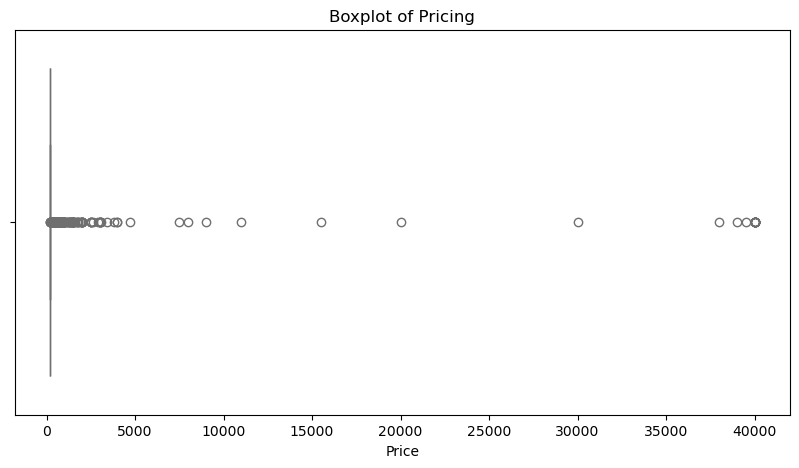

In [23]:
plt.figure(figsize = (10,5))
sns.boxplot(x=dataset["Price"], color ="skyblue")
plt.title("Boxplot of Pricing")
plt.show()

In [24]:
# Average Rating of APP on Playstore
avg_rating = dataset["Rating"].mean()
print(f"Average rating of the APP on PlayStore : {avg_rating:.1f}")

Average rating of the APP on PlayStore : 4.2


What Perecentage of Apps are Free vs Paid?

In [25]:
Total_apps = dataset.shape[0]
Free_apps = dataset[dataset["Type"]== "Free"].shape[0]
Paid_apps = dataset[dataset["Type"]== "Paid"].shape[0]

Free_apps_percentage = (Free_apps/Total_apps) * 100
Paid_apps_percentage = (Paid_apps/Total_apps) * 100

print(f"Free Apps Percentage : {Free_apps_percentage:.2f}%")
print(f"Paid Apps Percentage : {Paid_apps_percentage:.2f}%")

Free Apps Percentage : 92.61%
Paid Apps Percentage : 7.39%


What is the Most Common App Category?


In [26]:
most_common_app_category = dataset["Category"].value_counts()
most_common_app_category

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

In [27]:
most_common_app_category_name = dataset["Category"].value_counts().idxmax()
print(f"Most Common App Category : {most_common_app_category_name}")

Most Common App Category : FAMILY


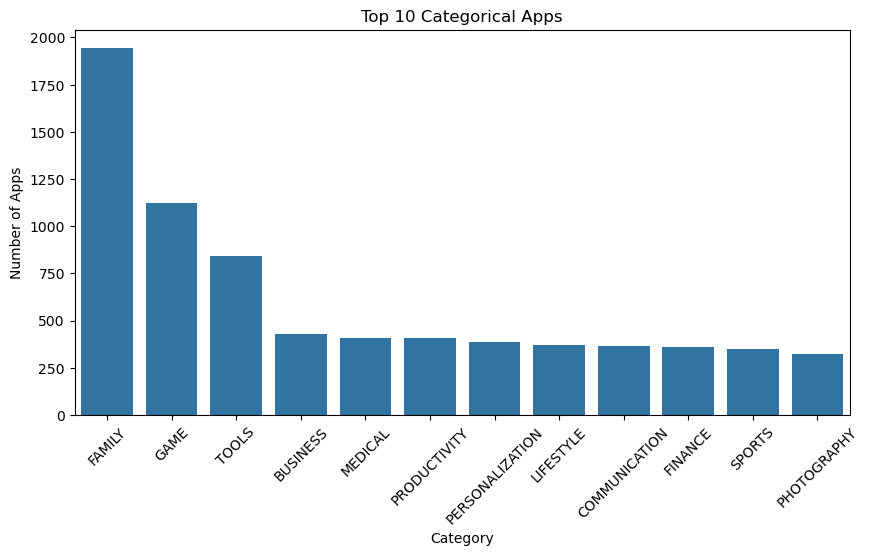

In [28]:
most_common_app_category = dataset["Category"].value_counts().head(12)
plt.figure(figsize=(10,5))
sns.barplot(x=most_common_app_category.index, y=most_common_app_category.values)
plt.title("Top 10 Categorical Apps")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

What is the distribuiton of Content Rating?

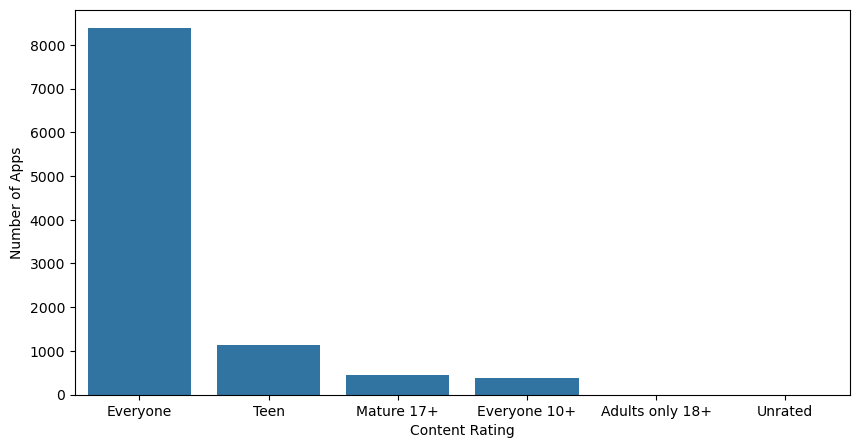

In [30]:
Content_Rating = dataset["Content Rating"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=Content_Rating.index, y= Content_Rating.values )
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()

- TOP 5 MOST POPULAR CATEGORIES?

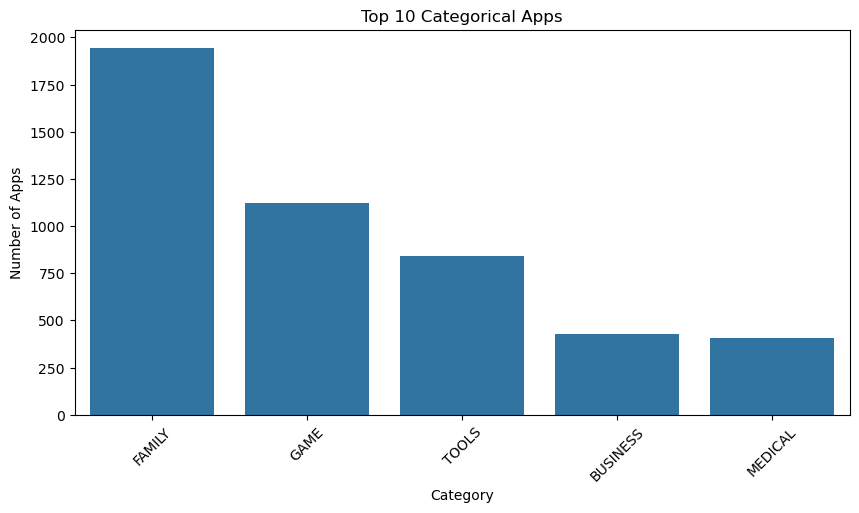

In [31]:
most_common_app_category = dataset["Category"].value_counts().head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=most_common_app_category.index, y=most_common_app_category.values)
plt.title("Top 10 Categorical Apps")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

-- COMMON RATING GIVEN TO APPS?

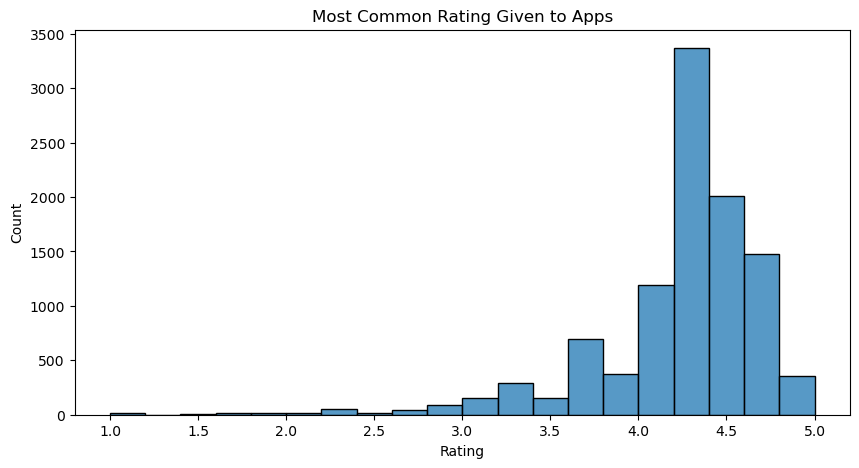

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(dataset["Rating"],bins=20)
plt.title("Most Common Rating Given to Apps")
plt.show()

- How are app prices  distributed?

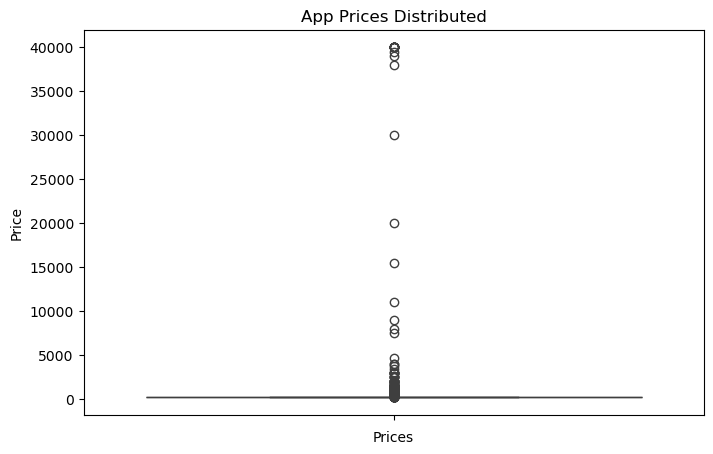

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(dataset["Price"])
plt.title("App Prices Distributed")
plt.xlabel("Prices")
plt.show()

- Do Free Apps have Better Ratings than Paid Apps? [Numerical data Vs Categorical data]

In [42]:
free_apps_avg_rating = dataset[dataset["Type"]=="Free"]["Rating"].mean()
paid_apps_avg_rating = dataset[dataset["Type"]=="Paid"]["Rating"].mean()

print(f"Aevrage Rating for Free apps:{  free_apps_avg_rating:.2f}")
print(f"Average Rating for Paid Apps:{  paid_apps_avg_rating:.2f}")

Aevrage Rating for Free apps:4.20
Average Rating for Paid Apps:4.27


- Highest AVG rating {categorical}

In [46]:
category_avg_rating = dataset.groupby("Category")["Rating"].mean().sort_values(ascending =False)
category_avg_rating.head(5)

Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.336522
PERSONALIZATION        4.327062
Name: Rating, dtype: float64

- Does a Higher Number of Installs Correlate with Higher ratings?

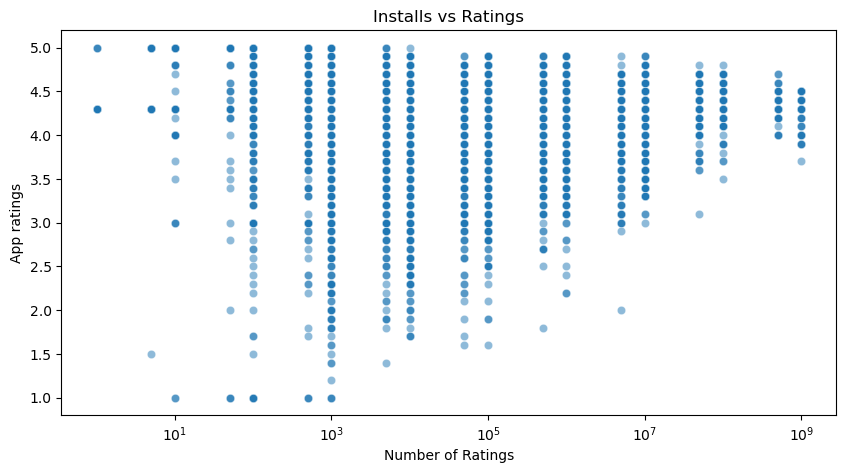

In [54]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= dataset["Installs"],y= dataset["Rating"], alpha=0.5)
plt.xscale("log")
plt.title("Installs vs Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("App ratings")
plt.show()

- Do Paid Apss generate More Installs than Free Apps?

In [57]:
free_installs = dataset[dataset["Type"]=="Free"]["Installs"].mean()
paid_installs = dataset[dataset["Type"]=="Paid"]["Installs"].mean()

print(f"Free Apps Installations :{free_installs:.2f}")
print(f"Paid Apps Installations :{paid_installs:.2f}")

Free Apps Installations :15279679.80
Paid Apps Installations :90491.35


- Are Expensive Apps Rated Higher than Free Apps?

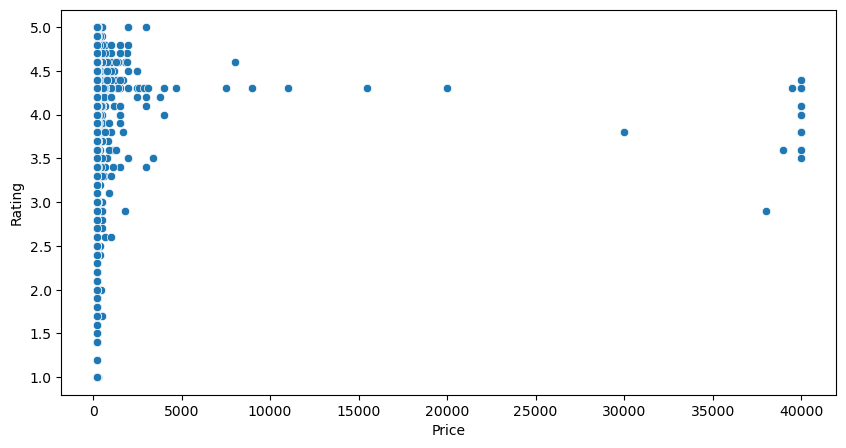

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=dataset["Price"], y = dataset["Rating"])
plt.show()

- Which Category have Most Paid Apps?

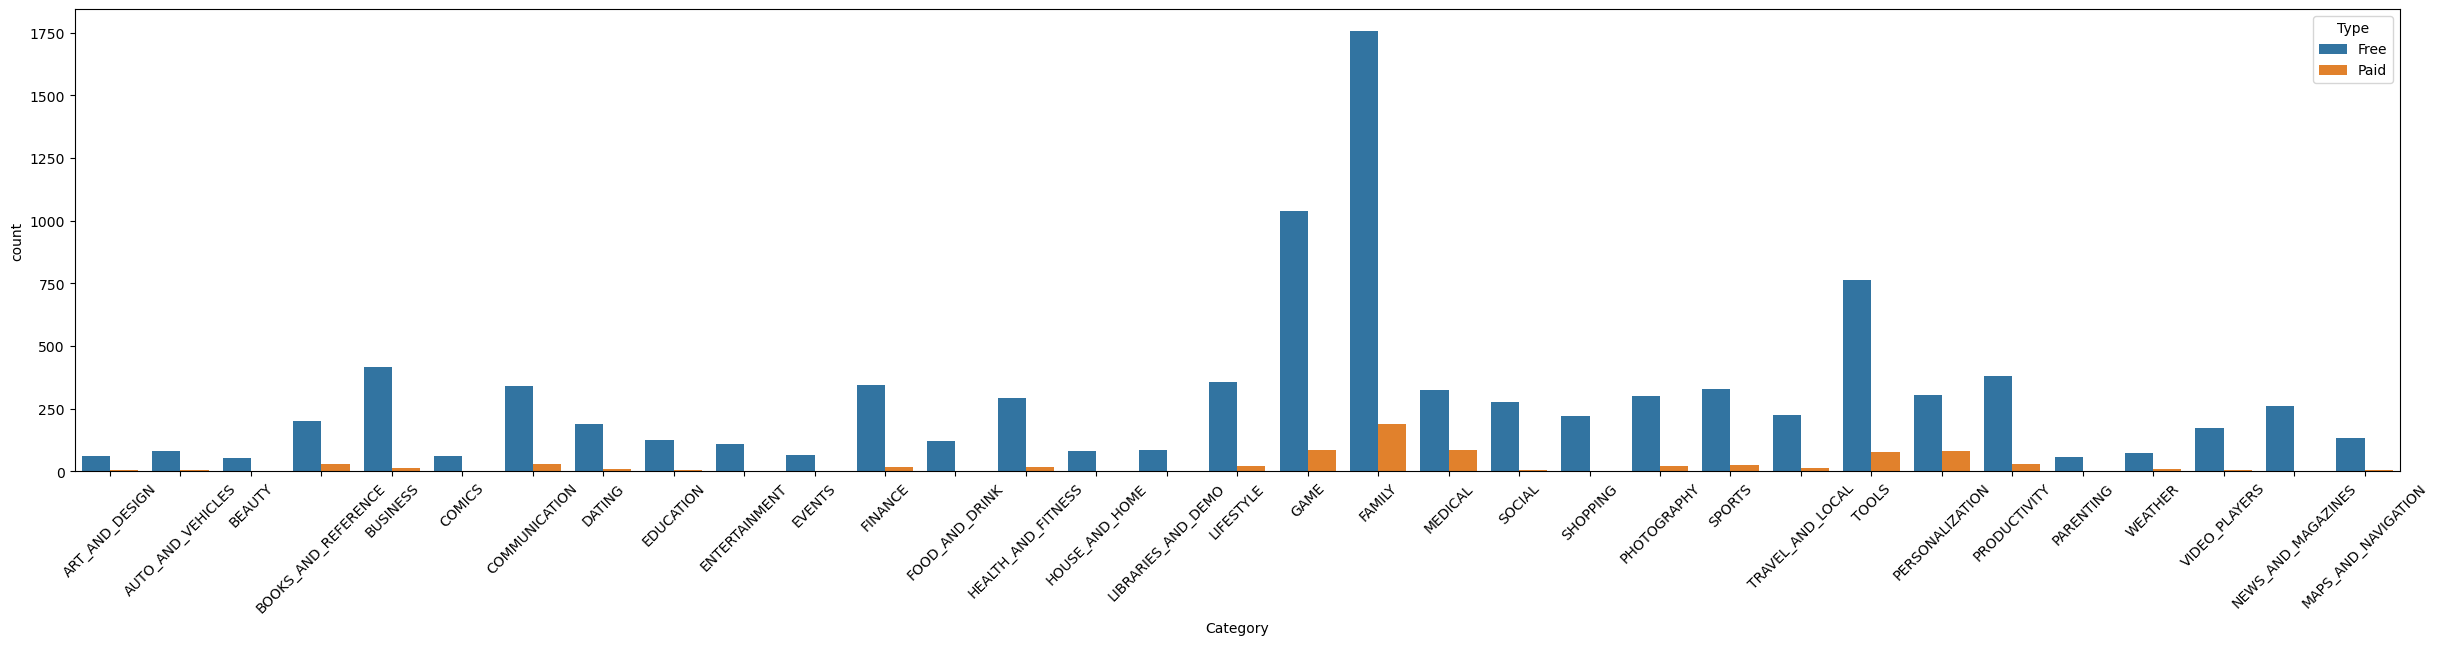

In [69]:
plt.figure(figsize=(30,6))
sns.countplot(x= "Category", hue= "Type", data= dataset)
plt.xticks(rotation=45)
plt.show()